Question 1: What is Logistic Regression, and how does it differ from Linear
Regression?

Ans1  Logistic Regression is a statistical and machine learning algorithm used for classification tasks, not prediction of a continuous value. Its primary goal is to predict the probability that a given input belongs to a specific category.

Linear Regression is a statistical method used for regression tasks. Its goal is to model the relationship between a dependent variable and one or more independent variables by fitting a straight line (or a hyperplane in higher dimensions) to the observed data.



Question 2: Explain the role of the Sigmoid function in Logistic Regression.

ANS2 The Sigmoid function (also called the logistic function) is a mathematical function that takes any real number and maps it to a value between 0 and 1. It has a characteristic S-shaped curve.

Its formula is:
σ(z) = 1 / (1 + e^(-z))

Question 3: What is Regularization in Logistic Regression and why is it needed?

Ans3 Regularization is a critical technique in logistic regression designed to prevent overfitting, a common problem where a model learns the training data too well, including its noise and random fluctuations, thereby failing to generalize to new, unseen data. This overfitting often manifests as a model with excessively large coefficients for certain features, making it overly complex and sensitive to minor variations in the input. To counter this, regularization introduces a penalty term to the model's loss function that constrains the magnitude of these coefficients, effectively discouraging complexity and promoting a simpler, more robust model. The strength of this penalty is controlled by a hyperparameter, lambda (λ). By shrinking the coefficients, regularization ensures the decision boundary is smoother and less tailored to the idiosyncrasies of the training set, ultimately leading to better performance on real-world data and improving the model's ability to identify truly important patterns.



Question 4: What are some common evaluation metrics for classification models, and
why are they important?

Ans4 Evaluation metrics for classification models are crucial because they provide a nuanced and objective understanding of a model's performance beyond a simplistic measure like accuracy, which can be highly misleading, especially with imbalanced datasets. These metrics, derived from the confusion matrix—such as precision, recall, and the F1-score—allow us to diagnose the specific nature of a model's errors by quantifying the trade-off between false positives and false negatives. This is vital for aligning the model's performance with real-world business objectives, as the cost of different error types varies greatly by context; for instance, a medical diagnostic model prioritizes high recall to minimize missed diseases, while a spam filter prioritizes high precision to avoid incorrectly blocking legitimate emails. Furthermore, metrics like the ROC-AUC score evaluate the model's overall discriminative power across all classification thresholds, offering a robust single value for comparing different models. Ultimately, this suite of metrics is indispensable for making informed decisions during model development, ensuring that the final model is not just statistically sound but also effective and reliable for its intended practical application.



Question 5: Write a Python program that loads a CSV file into a Pandas DataFrame,
splits into train/test sets, trains a Logistic Regression model, and prints its accuracy.
(Use Dataset from sklearn package)

Ans5

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

def logistic_regression_demo():
    """
    Complete workflow for loading data, training logistic regression, and evaluating performance
    """

    # 1. Load dataset from sklearn
    print("Step 1: Loading dataset from sklearn...")
    cancer_data = load_breast_cancer()

    # 2. Create Pandas DataFrame
    print("Step 2: Creating Pandas DataFrame...")
    df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)
    df['target'] = cancer_data.target

    # Display basic information about the dataset
    print(f"Dataset shape: {df.shape}")
    print(f"Features: {df.shape[1] - 1} samples")
    print(f"Target variable distribution:\n{df['target'].value_counts()}")
    print(f"Target meaning: 0 = {cancer_data.target_names[0]}, 1 = {cancer_data.target_names[1]}")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())

    # 3. Split data into features (X) and target (y)
    print("\nStep 3: Preparing features and target...")
    X = df.drop('target', axis=1)
    y = df['target']

    # 4. Split into training and testing sets
    print("Step 4: Splitting into train/test sets...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,  # for reproducibility
        stratify=y        # maintain class distribution in splits
    )

    print(f"Training set size: {X_train.shape[0]} samples")
    print(f"Testing set size: {X_test.shape[0]} samples")
    print(f"Training set class distribution:\n{y_train.value_counts()}")

    # 5. Create and train Logistic Regression model
    print("\nStep 5: Training Logistic Regression model...")
    model = LogisticRegression(
        random_state=42,
        max_iter=1000  # Increase iterations for convergence
    )

    model.fit(X_train, y_train)
    print("Model training completed!")

    # 6. Make predictions
    print("Step 6: Making predictions...")
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1

    # 7. Evaluate the model
    print("Step 7: Evaluating the model...")
    accuracy = accuracy_score(y_test, y_pred)

    print("\n" + "="*50)
    print("MODEL EVALUATION RESULTS")
    print("="*50)
    print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

    # Additional evaluation metrics
    print(f"\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=cancer_data.target_names))

    # Display some prediction examples
    print("\nPrediction Examples (first 10 test samples):")
    results_df = pd.DataFrame({
        'Actual': y_test.values[:10],
        'Predicted': y_pred[:10],
        'Probability_Class_1': y_pred_proba[:10].round(4)
    })
    results_df['Actual_Label'] = results_df['Actual'].map({0: 'malignant', 1: 'benign'})
    results_df['Predicted_Label'] = results_df['Predicted'].map({0: 'malignant', 1: 'benign'})
    print(results_df[['Actual_Label', 'Predicted_Label', 'Probability_Class_1']])

    # Feature importance (coefficients)
    print(f"\nTop 5 most important features (by coefficient magnitude):")
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'coefficient': model.coef_[0]
    })
    feature_importance['abs_coefficient'] = np.abs(feature_importance['coefficient'])
    top_features = feature_importance.nlargest(5, 'abs_coefficient')
    print(top_features[['feature', 'coefficient']].round(4))

    return model, X_test, y_test, y_pred

# Run the demonstration
if __name__ == "__main__":
    model, X_test, y_test, y_pred = logistic_regression_demo()

Step 1: Loading dataset from sklearn...
Step 2: Creating Pandas DataFrame...
Dataset shape: (569, 31)
Features: 30 samples
Target variable distribution:
target
1    357
0    212
Name: count, dtype: int64
Target meaning: 0 = malignant, 1 = benign

First 5 rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974       

Step 1: Loading breast cancer dataset from sklearn...
Step 2: Creating Pandas DataFrame...
Dataset shape: (569, 31)
Features: 30 samples
Target distribution - 0 (malignant): 212, 1 (benign): 357

Step 3: Preparing features and target...
Step 4: Splitting into train/test sets...
Step 5: Standardizing features...
Step 6: Training Logistic Regression with L2 regularization...

--- Training model with C=10.0 ---
Accuracy with C=10.0: 0.9649
Number of non-zero coefficients: 30

--- Training model with C=1.0 ---
Accuracy with C=1.0: 0.9825
Number of non-zero coefficients: 30

--- Training model with C=0.1 ---
Accuracy with C=0.1: 0.9825
Number of non-zero coefficients: 30

--- Training model with C=0.01 ---
Accuracy with C=0.01: 0.9561
Number of non-zero coefficients: 30

DETAILED RESULTS FOR BEST MODEL (C=1.0)
Final Model Accuracy: 0.9825 (98.25%)
Model Intercept: 0.2473

MODEL COEFFICIENTS (L2 Regularized)
All coefficients (sorted by magnitude):
                    Feature  Coefficient  Ab

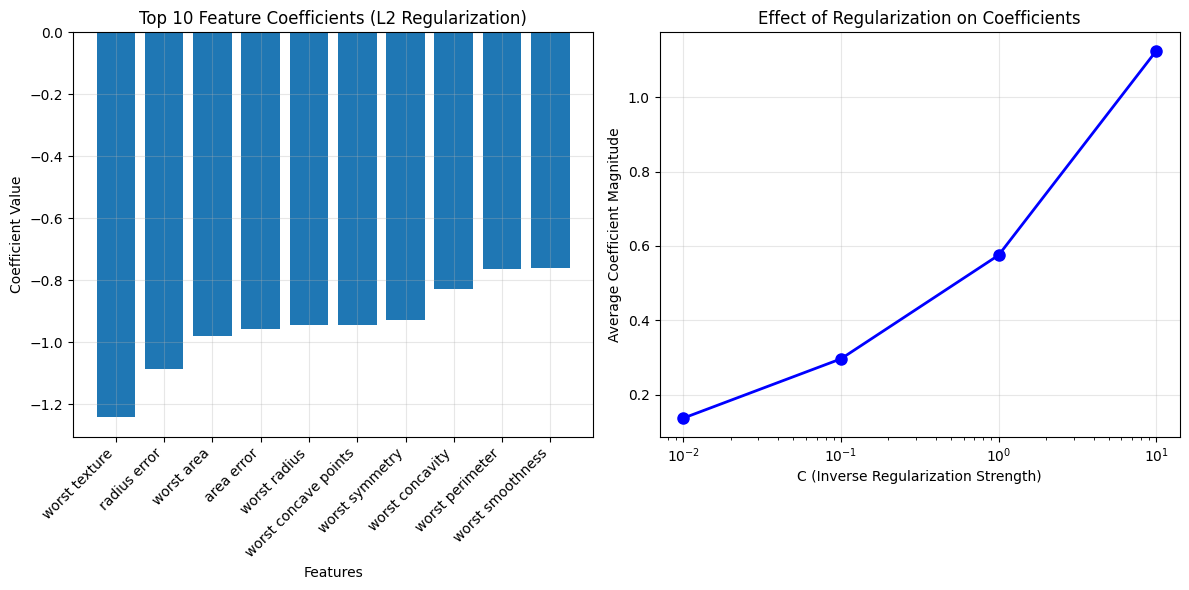


CLASSIFICATION REPORT
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [3]:
"""Question 6: Write a Python program to train a Logistic Regression model using L2
regularization (Ridge) and print the model coefficients and accuracy.
(Use Dataset from sklearn package)"""

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def logistic_regression_l2_demo():
    """
    Complete workflow for training Logistic Regression with L2 regularization
    """

    # 1. Load dataset from sklearn
    print("Step 1: Loading breast cancer dataset from sklearn...")
    cancer_data = load_breast_cancer()

    # 2. Create Pandas DataFrame
    print("Step 2: Creating Pandas DataFrame...")
    df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)
    df['target'] = cancer_data.target

    # Display basic information about the dataset
    print(f"Dataset shape: {df.shape}")
    print(f"Features: {df.shape[1] - 1} samples")
    print(f"Target distribution - 0 (malignant): {(df['target'] == 0).sum()}, 1 (benign): {(df['target'] == 1).sum()}")

    # 3. Split data into features (X) and target (y)
    print("\nStep 3: Preparing features and target...")
    X = df.drop('target', axis=1)
    y = df['target']

    # 4. Split into training and testing sets
    print("Step 4: Splitting into train/test sets...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    # 5. Standardize the features (important for regularization)
    print("Step 5: Standardizing features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 6. Create and train Logistic Regression model with L2 regularization
    print("Step 6: Training Logistic Regression with L2 regularization...")

    # Different C values to demonstrate regularization strength
    C_values = [10.0, 1.0, 0.1, 0.01]  # C = 1/λ, so smaller C = stronger regularization

    results = {}

    for C_val in C_values:
        print(f"\n--- Training model with C={C_val} ---")

        # Create model with L2 penalty (Ridge)
        model = LogisticRegression(
            penalty='l2',           # L2 regularization (Ridge)
            C=C_val,                # Inverse of regularization strength
            solver='liblinear',     # Good solver for L1/L2 regularization
            random_state=42,
            max_iter=1000
        )

        # Train the model
        model.fit(X_train_scaled, y_train)

        # Make predictions
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)

        # Store results
        results[C_val] = {
            'model': model,
            'accuracy': accuracy,
            'coefficients': model.coef_[0],
            'intercept': model.intercept_[0]
        }

        print(f"Accuracy with C={C_val}: {accuracy:.4f}")
        print(f"Number of non-zero coefficients: {np.sum(model.coef_[0] != 0)}")

    # 7. Display detailed results for the best model
    print("\n" + "="*60)
    print("DETAILED RESULTS FOR BEST MODEL (C=1.0)")
    print("="*60)

    best_model_info = results[1.0]  # Using C=1.0 as our reference model
    best_model = best_model_info['model']

    # Make final predictions with best model
    y_pred_final = best_model.predict(X_test_scaled)
    final_accuracy = accuracy_score(y_test, y_pred_final)

    print(f"Final Model Accuracy: {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")
    print(f"Model Intercept: {best_model_info['intercept']:.4f}")

    # 8. Display all coefficients
    print("\n" + "="*60)
    print("MODEL COEFFICIENTS (L2 Regularized)")
    print("="*60)

    # Create a DataFrame for better visualization of coefficients
    coef_df = pd.DataFrame({
        'Feature': cancer_data.feature_names,
        'Coefficient': best_model_info['coefficients'],
        'Abs_Coefficient': np.abs(best_model_info['coefficients'])
    })

    # Sort by absolute value to see most influential features
    coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

    print("All coefficients (sorted by magnitude):")
    print(coef_df.round(4))

    # 9. Display top 10 most influential features
    print("\n" + "="*60)
    print("TOP 10 MOST INFLUENTIAL FEATURES")
    print("="*60)
    print(coef_df.head(10).round(4))

    # 10. Compare coefficient magnitudes across different C values
    print("\n" + "="*60)
    print("COEFFICIENT MAGNITUDE COMPARISON ACROSS REGULARIZATION STRENGTHS")
    print("="*60)

    comparison_data = []
    for C_val, result in results.items():
        coef_magnitude = np.mean(np.abs(result['coefficients']))
        comparison_data.append({
            'C': C_val,
            'Lambda (1/C)': 1/C_val,
            'Avg_Coefficient_Magnitude': coef_magnitude,
            'Accuracy': result['accuracy']
        })

    comparison_df = pd.DataFrame(comparison_data)
    print(comparison_df.round(4))

    # 11. Plot coefficient comparison
    plt.figure(figsize=(12, 6))

    # Plot 1: Coefficient magnitudes for different features
    plt.subplot(1, 2, 1)
    features_to_plot = 10
    feature_names = coef_df['Feature'].head(features_to_plot).values
    x_pos = np.arange(len(feature_names))

    plt.bar(x_pos, coef_df['Coefficient'].head(features_to_plot))
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.title('Top 10 Feature Coefficients (L2 Regularization)')
    plt.xticks(x_pos, feature_names, rotation=45, ha='right')
    plt.grid(True, alpha=0.3)

    # Plot 2: Effect of regularization strength on coefficients
    plt.subplot(1, 2, 2)
    C_vals = list(results.keys())
    mean_coef_mags = [np.mean(np.abs(results[C]['coefficients'])) for C in C_vals]

    plt.semilogx(C_vals, mean_coef_mags, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('C (Inverse Regularization Strength)')
    plt.ylabel('Average Coefficient Magnitude')
    plt.title('Effect of Regularization on Coefficients')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 12. Print classification report
    print("\n" + "="*60)
    print("CLASSIFICATION REPORT")
    print("="*60)
    print(classification_report(y_test, y_pred_final,
                              target_names=cancer_data.target_names))

    return results, coef_df, X_test_scaled, y_test

# Run the demonstration
if __name__ == "__main__":
    results, coef_df, X_test, y_test = logistic_regression_l2_demo()

Step 1: Loading Iris dataset from sklearn...
Step 2: Creating Pandas DataFrame...
Dataset shape: (150, 6)
Features: 4 samples
Target classes: ['setosa' 'versicolor' 'virginica']
Target distribution:
target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  

Step 3: Preparing features and target...
Step 4: Splitting int

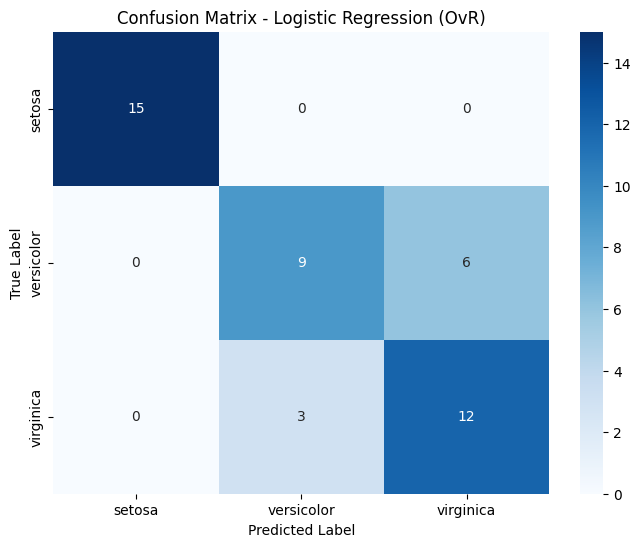


MODEL COEFFICIENTS (One-vs-Rest)
In OvR, we have one binary classifier for each class:

--- Classifier for setosa vs Rest ---
Intercept: -1.4788
Feature Coefficients:
  sepal length (cm)   :  -0.8196
  sepal width (cm)    :   1.3089
  petal length (cm)   :  -1.5394
  petal width (cm)    :  -1.3789

--- Classifier for versicolor vs Rest ---
Intercept: -0.9308
Feature Coefficients:
  sepal length (cm)   :   0.1419
  sepal width (cm)    :  -1.4373
  petal length (cm)   :   0.7280
  petal width (cm)    :  -0.8932

--- Classifier for virginica vs Rest ---
Intercept: -2.1479
Feature Coefficients:
  sepal length (cm)   :   0.1626
  sepal width (cm)    :   0.2189
  petal length (cm)   :   1.4340
  petal width (cm)    :   2.4370

COMPARISON WITH multinomial APPROACH
OvR Accuracy:       0.8000
Multinomial Accuracy: 0.9111

PREDICTION PROBABILITIES FOR TEST SAMPLES
   True_Class Predicted_Class  Prob_setosa  Prob_versicolor  Prob_virginica
0   virginica       virginica       0.0010           0.3

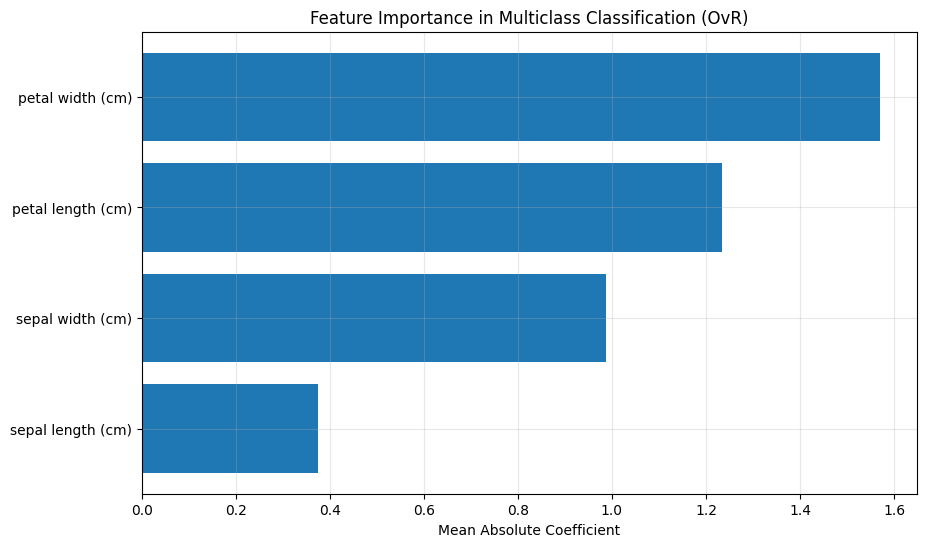


ADDITIONAL EXAMPLE: WINE DATASET
Wine dataset - Number of classes: 3
Wine dataset - Class names: ['class_0' 'class_1' 'class_2']
Wine dataset - Accuracy: 0.9815

Classification Report for Wine Dataset:
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.95      0.98        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [5]:
"""Question 7: Write a Python program to train a Logistic Regression model for multiclass
classification using multi_class='ovr' and print the classification report.
(Use Dataset from sklearn package)"""

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def multiclass_logistic_regression_ovr():
    """
    Complete workflow for multiclass classification using One-vs-Rest (OvR) strategy
    """

    # 1. Load dataset from sklearn (using Iris dataset - 3 classes)
    print("Step 1: Loading Iris dataset from sklearn...")
    iris_data = load_iris()

    # 2. Create Pandas DataFrame
    print("Step 2: Creating Pandas DataFrame...")
    df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
    df['target'] = iris_data.target
    df['target_name'] = df['target'].map({i: name for i, name in enumerate(iris_data.target_names)})

    # Display basic information about the dataset
    print(f"Dataset shape: {df.shape}")
    print(f"Features: {df.shape[1] - 2} samples")
    print(f"Target classes: {iris_data.target_names}")
    print(f"Target distribution:\n{df['target_name'].value_counts()}")

    # Display first few rows
    print("\nFirst 5 rows of the dataset:")
    print(df.head())

    # 3. Split data into features (X) and target (y)
    print("\nStep 3: Preparing features and target...")
    X = df.drop(['target', 'target_name'], axis=1)
    y = df['target']

    # 4. Split into training and testing sets
    print("Step 4: Splitting into train/test sets...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.3,
        random_state=42,
        stratify=y  # Maintain class distribution in splits
    )

    print(f"Training set size: {X_train.shape[0]} samples")
    print(f"Testing set size: {X_test.shape[0]} samples")
    print(f"Training set class distribution:\n{pd.Series(y_train).value_counts().sort_index()}")

    # 5. Standardize the features (recommended for logistic regression)
    print("\nStep 5: Standardizing features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 6. Create and train Logistic Regression model with multi_class='ovr'
    print("\nStep 6: Training Logistic Regression with multi_class='ovr'...")

    model_ovr = LogisticRegression(
        multi_class='ovr',           # One-vs-Rest strategy
        solver='liblinear',          # liblinear works well with ovr
        random_state=42,
        max_iter=1000
    )

    # Train the model
    model_ovr.fit(X_train_scaled, y_train)
    print("Model training completed!")

    # 7. Make predictions
    print("Step 7: Making predictions...")
    y_pred_ovr = model_ovr.predict(X_test_scaled)
    y_pred_proba_ovr = model_ovr.predict_proba(X_test_scaled)

    # 8. Evaluate the model
    print("Step 8: Evaluating the model...")
    accuracy_ovr = accuracy_score(y_test, y_pred_ovr)

    print("\n" + "="*60)
    print("MULTICLASS LOGISTIC REGRESSION RESULTS (One-vs-Rest)")
    print("="*60)
    print(f"Overall Accuracy: {accuracy_ovr:.4f} ({accuracy_ovr*100:.2f}%)")

    # 9. Display detailed classification report
    print("\n" + "="*60)
    print("CLASSIFICATION REPORT")
    print("="*60)
    print(classification_report(y_test, y_pred_ovr,
                              target_names=iris_data.target_names))

    # 10. Display confusion matrix
    print("\n" + "="*60)
    print("CONFUSION MATRIX")
    print("="*60)
    cm = confusion_matrix(y_test, y_pred_ovr)
    print("Raw confusion matrix:")
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=iris_data.target_names,
                yticklabels=iris_data.target_names)
    plt.title('Confusion Matrix - Logistic Regression (OvR)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # 11. Display model coefficients for each class
    print("\n" + "="*60)
    print("MODEL COEFFICIENTS (One-vs-Rest)")
    print("="*60)
    print("In OvR, we have one binary classifier for each class:")

    for i, class_name in enumerate(iris_data.target_names):
        print(f"\n--- Classifier for {class_name} vs Rest ---")
        print(f"Intercept: {model_ovr.intercept_[i]:.4f}")
        print("Feature Coefficients:")
        for feature, coef in zip(iris_data.feature_names, model_ovr.coef_[i]):
            print(f"  {feature:20}: {coef:8.4f}")

    # 12. Compare with multinomial approach
    print("\n" + "="*60)
    print("COMPARISON WITH multinomial APPROACH")
    print("="*60)

    # Train a multinomial model for comparison
    model_multinomial = LogisticRegression(
        multi_class='multinomial',   # Softmax regression
        solver='lbfgs',              # lbfgs works well with multinomial
        random_state=42,
        max_iter=1000
    )

    model_multinomial.fit(X_train_scaled, y_train)
    y_pred_multinomial = model_multinomial.predict(X_test_scaled)
    accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)

    print(f"OvR Accuracy:       {accuracy_ovr:.4f}")
    print(f"Multinomial Accuracy: {accuracy_multinomial:.4f}")

    # 13. Display prediction probabilities for a few test samples
    print("\n" + "="*60)
    print("PREDICTION PROBABILITIES FOR TEST SAMPLES")
    print("="*60)

    sample_indices = range(5)  # First 5 test samples
    results_df = pd.DataFrame({
        'True_Class': [iris_data.target_names[y_test.iloc[i]] for i in sample_indices],
        'Predicted_Class': [iris_data.target_names[y_pred_ovr[i]] for i in sample_indices],
    })

    # Add probability columns
    for i, class_name in enumerate(iris_data.target_names):
        results_df[f'Prob_{class_name}'] = y_pred_proba_ovr[sample_indices, i].round(4)

    print(results_df)

    # 14. Feature importance analysis
    print("\n" + "="*60)
    print("FEATURE IMPORTANCE ANALYSIS")
    print("="*60)

    # Calculate mean absolute coefficient for each feature across all classifiers
    feature_importance = pd.DataFrame({
        'feature': iris_data.feature_names,
        'mean_abs_coefficient': np.mean(np.abs(model_ovr.coef_), axis=0)
    }).sort_values('mean_abs_coefficient', ascending=False)

    print("Feature importance (average absolute coefficient across all classifiers):")
    print(feature_importance)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['feature'], feature_importance['mean_abs_coefficient'])
    plt.xlabel('Mean Absolute Coefficient')
    plt.title('Feature Importance in Multiclass Classification (OvR)')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3)
    plt.show()

    return model_ovr, X_test_scaled, y_test, y_pred_ovr

# Additional example with Wine dataset (more classes)
def wine_dataset_example():
    """
    Additional example using Wine dataset with 3 classes
    """
    print("\n" + "="*80)
    print("ADDITIONAL EXAMPLE: WINE DATASET")
    print("="*80)

    # Load Wine dataset
    wine_data = load_wine()
    X_wine = wine_data.data
    y_wine = wine_data.target

    # Split and scale
    X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
        X_wine, y_wine, test_size=0.3, random_state=42, stratify=y_wine
    )

    scaler_w = StandardScaler()
    X_train_scaled_w = scaler_w.fit_transform(X_train_w)
    X_test_scaled_w = scaler_w.transform(X_test_w)

    # Train OvR model
    model_wine = LogisticRegression(
        multi_class='ovr',
        solver='liblinear',
        random_state=42,
        max_iter=1000
    )

    model_wine.fit(X_train_scaled_w, y_train_w)
    y_pred_wine = model_wine.predict(X_test_scaled_w)

    print(f"Wine dataset - Number of classes: {len(wine_data.target_names)}")
    print(f"Wine dataset - Class names: {wine_data.target_names}")
    print(f"Wine dataset - Accuracy: {accuracy_score(y_test_w, y_pred_wine):.4f}")
    print("\nClassification Report for Wine Dataset:")
    print(classification_report(y_test_w, y_pred_wine, target_names=wine_data.target_names))

# Run the demonstration
if __name__ == "__main__":
    model_ovr, X_test, y_test, y_pred = multiclass_logistic_regression_ovr()
    wine_dataset_example()

Step 1: Loading breast cancer dataset from sklearn...
Step 2: Creating Pandas DataFrame...
Dataset shape: (569, 31)
Features: 30 samples
Target distribution:
target
1    357
0    212
Name: count, dtype: int64
Target meaning: 0 = malignant, 1 = benign

Step 3: Preparing features and target...
Step 4: Splitting into train/test sets...
Training set size: 455 samples
Testing set size: 114 samples

Step 5: Standardizing features...

Step 6: Setting up GridSearchCV...
Parameter grid to search:
  C: [0.001, 0.01, 0.1, 1, 10, 100, 1000]
  penalty: ['l1', 'l2']
  solver: ['liblinear', 'saga']

Step 7: Performing grid search (this may take a moment)...
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Grid search completed!

GRIDSEARCHCV RESULTS
Best parameters found: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation accuracy: 0.9824
Best estimator: LogisticRegression(C=0.1, max_iter=5000, random_state=42, solver='saga')

EVALUATION ON TEST SET
Test set accuracy: 0.

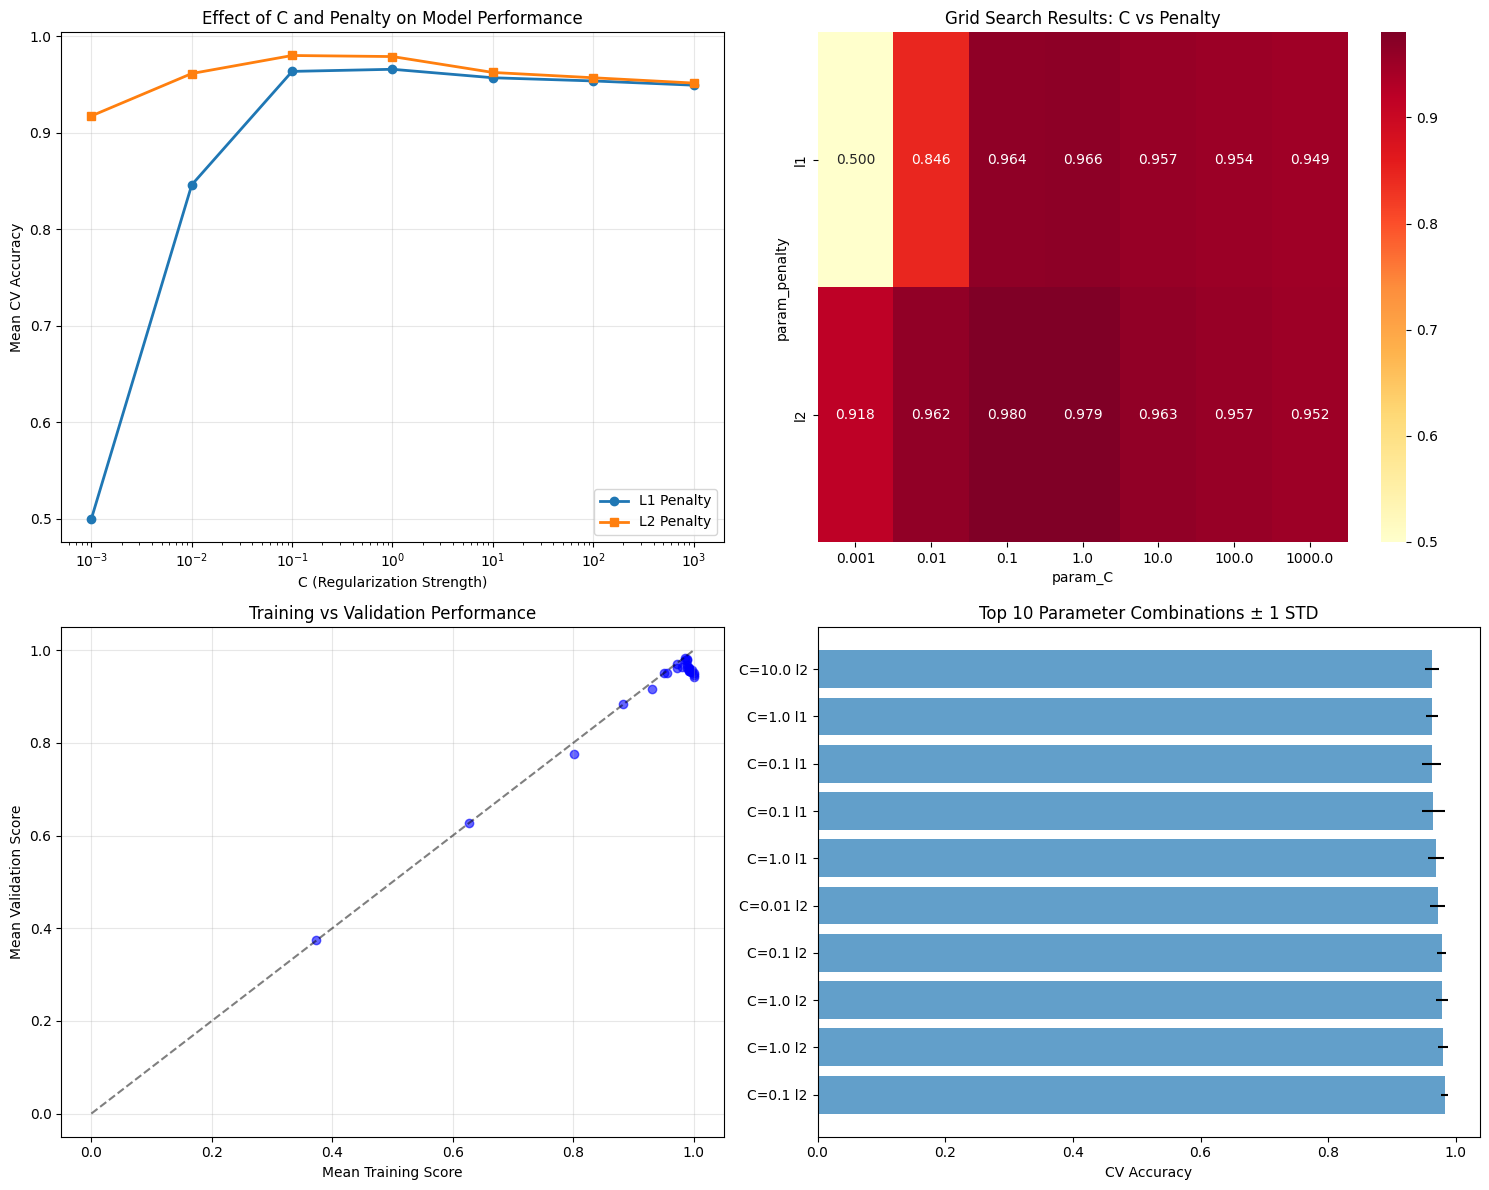


COMPARISON WITH DEFAULT PARAMETERS
Default model accuracy: 0.9825
Tuned model accuracy:   0.9737
Improvement:           -0.0088

DETAILED CLASSIFICATION REPORT FOR BEST MODEL
              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        42
      benign       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



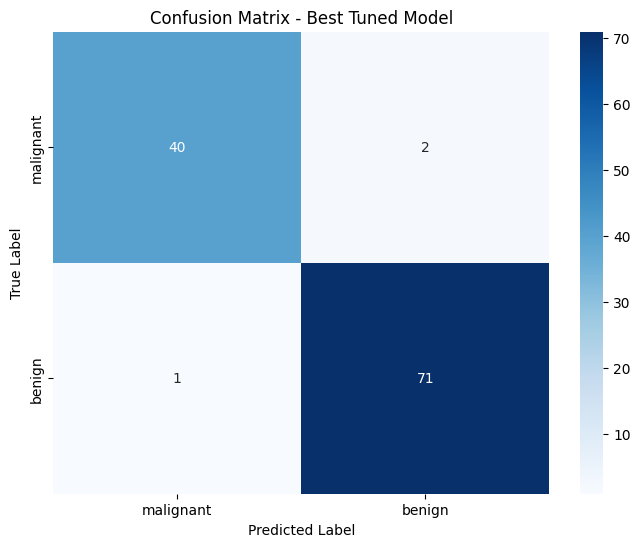


FEATURE IMPORTANCE FROM BEST MODEL
Top 10 most important features:
                 feature  coefficient  abs_coefficient
21         worst texture      -0.5630           0.5630
20          worst radius      -0.5094           0.5094
27  worst concave points      -0.5073           0.5073
22       worst perimeter      -0.4662           0.4662
23            worst area      -0.4623           0.4623
1           mean texture      -0.4401           0.4401
10          radius error      -0.4387           0.4387
28        worst symmetry      -0.4122           0.4122
7    mean concave points      -0.4040           0.4040
0            mean radius      -0.3973           0.3973

ADDITIONAL ANALYSIS
Total number of parameter combinations tested: 28
Total computation time: 0.03 seconds


In [6]:
"""Question 8: Write a Python program to apply GridSearchCV to tune C and penalty
hyperparameters for Logistic Regression and print the best parameters and validation
accuracy."""

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

def gridsearch_logistic_regression():
    """
    Complete workflow for hyperparameter tuning using GridSearchCV
    """

    # 1. Load dataset from sklearn
    print("Step 1: Loading breast cancer dataset from sklearn...")
    cancer_data = load_breast_cancer()

    # 2. Create Pandas DataFrame
    print("Step 2: Creating Pandas DataFrame...")
    df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)
    df['target'] = cancer_data.target

    # Display basic information about the dataset
    print(f"Dataset shape: {df.shape}")
    print(f"Features: {df.shape[1] - 1} samples")
    print(f"Target distribution:\n{df['target'].value_counts()}")
    print(f"Target meaning: 0 = {cancer_data.target_names[0]}, 1 = {cancer_data.target_names[1]}")

    # 3. Split data into features (X) and target (y)
    print("\nStep 3: Preparing features and target...")
    X = df.drop('target', axis=1)
    y = df['target']

    # 4. Split into training and testing sets
    print("Step 4: Splitting into train/test sets...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    print(f"Training set size: {X_train.shape[0]} samples")
    print(f"Testing set size: {X_test.shape[0]} samples")

    # 5. Standardize the features (important for regularization)
    print("\nStep 5: Standardizing features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 6. Define the parameter grid for GridSearchCV
    print("\nStep 6: Setting up GridSearchCV...")

    # Define the parameter grid
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
        'penalty': ['l1', 'l2'],                     # Regularization type
        'solver': ['liblinear', 'saga']              # Solvers that work with both L1 and L2
    }

    print("Parameter grid to search:")
    for key, values in param_grid.items():
        print(f"  {key}: {values}")

    # 7. Create Logistic Regression model
    base_model = LogisticRegression(random_state=42, max_iter=5000)

    # 8. Set up cross-validation strategy
    cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # 9. Create GridSearchCV object
    grid_search = GridSearchCV(
        estimator=base_model,
        param_grid=param_grid,
        cv=cv_strategy,
        scoring='accuracy',
        n_jobs=-1,  # Use all available cores
        verbose=1,   # Show progress
        return_train_score=True
    )

    # 10. Perform the grid search
    print("\nStep 7: Performing grid search (this may take a moment)...")
    grid_search.fit(X_train_scaled, y_train)

    print("Grid search completed!")

    # 11. Display the best parameters and scores
    print("\n" + "="*70)
    print("GRIDSEARCHCV RESULTS")
    print("="*70)

    print(f"Best parameters found: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")
    print(f"Best estimator: {grid_search.best_estimator_}")

    # 12. Evaluate the best model on test data
    print("\n" + "="*70)
    print("EVALUATION ON TEST SET")
    print("="*70)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred)

    print(f"Test set accuracy: {test_accuracy:.4f}")
    print(f"Cross-validation vs Test accuracy difference: {grid_search.best_score_ - test_accuracy:.4f}")

    # 13. Display detailed results for top 10 parameter combinations
    print("\n" + "="*70)
    print("TOP 10 PARAMETER COMBINATIONS")
    print("="*70)

    results_df = pd.DataFrame(grid_search.cv_results_)

    # Select and display important columns
    display_columns = [
        'mean_test_score', 'std_test_score', 'mean_train_score',
        'param_C', 'param_penalty', 'param_solver'
    ]

    top_results = results_df[display_columns].sort_values('mean_test_score', ascending=False).head(10)
    top_results = top_results.round(4)

    print(top_results.to_string(index=False))

    # 14. Visualize the grid search results
    print("\nStep 8: Creating visualizations...")
    visualize_grid_search_results(grid_search, param_grid)

    # 15. Compare with default model
    print("\n" + "="*70)
    print("COMPARISON WITH DEFAULT PARAMETERS")
    print("="*70)

    default_model = LogisticRegression(random_state=42, max_iter=5000)
    default_model.fit(X_train_scaled, y_train)
    default_accuracy = default_model.score(X_test_scaled, y_test)

    print(f"Default model accuracy: {default_accuracy:.4f}")
    print(f"Tuned model accuracy:   {test_accuracy:.4f}")
    print(f"Improvement:           {test_accuracy - default_accuracy:+.4f}")

    # 16. Detailed classification report for best model
    print("\n" + "="*70)
    print("DETAILED CLASSIFICATION REPORT FOR BEST MODEL")
    print("="*70)
    print(classification_report(y_test, y_pred, target_names=cancer_data.target_names))

    # 17. Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=cancer_data.target_names,
                yticklabels=cancer_data.target_names)
    plt.title('Confusion Matrix - Best Tuned Model')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # 18. Feature importance from best model
    print("\n" + "="*70)
    print("FEATURE IMPORTANCE FROM BEST MODEL")
    print("="*70)

    feature_importance = pd.DataFrame({
        'feature': cancer_data.feature_names,
        'coefficient': best_model.coef_[0],
        'abs_coefficient': np.abs(best_model.coef_[0])
    }).sort_values('abs_coefficient', ascending=False)

    print("Top 10 most important features:")
    print(feature_importance.head(10).round(4))

    return grid_search, best_model, X_test_scaled, y_test

def visualize_grid_search_results(grid_search, param_grid):
    """
    Create visualizations for grid search results
    """
    results_df = pd.DataFrame(grid_search.cv_results_)

    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Plot 1: Performance for different C values (L1 vs L2)
    C_values = param_grid['C']

    # Separate results by penalty type
    l1_results = results_df[results_df['param_penalty'] == 'l1']
    l2_results = results_df[results_df['param_penalty'] == 'l2']

    axes[0, 0].plot(C_values,
                   [l1_results[l1_results['param_C'] == c]['mean_test_score'].mean()
                    for c in C_values],
                   'o-', label='L1 Penalty', linewidth=2)
    axes[0, 0].plot(C_values,
                   [l2_results[l2_results['param_C'] == c]['mean_test_score'].mean()
                    for c in C_values],
                   's-', label='L2 Penalty', linewidth=2)
    axes[0, 0].set_xscale('log')
    axes[0, 0].set_xlabel('C (Regularization Strength)')
    axes[0, 0].set_ylabel('Mean CV Accuracy')
    axes[0, 0].set_title('Effect of C and Penalty on Model Performance')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Plot 2: Heatmap of C vs Penalty
    heatmap_data = results_df.pivot_table(
        values='mean_test_score',
        index='param_penalty',
        columns='param_C',
        aggfunc='mean'
    )
    sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='YlOrRd', ax=axes[0, 1])
    axes[0, 1].set_title('Grid Search Results: C vs Penalty')

    # Plot 3: Training vs Validation scores
    axes[1, 0].scatter(results_df['mean_train_score'],
                      results_df['mean_test_score'],
                      alpha=0.6, c='blue')
    axes[1, 0].plot([0, 1], [0, 1], 'k--', alpha=0.5)
    axes[1, 0].set_xlabel('Mean Training Score')
    axes[1, 0].set_ylabel('Mean Validation Score')
    axes[1, 0].set_title('Training vs Validation Performance')
    axes[1, 0].grid(True, alpha=0.3)

    # Plot 4: Standard deviation of scores
    top_10 = results_df.nlargest(10, 'mean_test_score')
    axes[1, 1].barh(range(len(top_10)), top_10['mean_test_score'],
                   xerr=top_10['std_test_score'], alpha=0.7)
    axes[1, 1].set_yticks(range(len(top_10)))
    axes[1, 1].set_yticklabels([f"C={row['param_C']} {row['param_penalty']}"
                               for _, row in top_10.iterrows()])
    axes[1, 1].set_xlabel('CV Accuracy')
    axes[1, 1].set_title('Top 10 Parameter Combinations ± 1 STD')

    plt.tight_layout()
    plt.show()

# Run the demonstration
if __name__ == "__main__":
    grid_search, best_model, X_test, y_test = gridsearch_logistic_regression()

    # Additional analysis
    print("\n" + "="*70)
    print("ADDITIONAL ANALYSIS")
    print("="*70)
    print(f"Total number of parameter combinations tested: {len(grid_search.cv_results_['params'])}")
    print(f"Total computation time: {grid_search.refit_time_:.2f} seconds")

Step 1: Loading breast cancer dataset from sklearn...
Step 2: Creating Pandas DataFrame...
Dataset shape: (569, 31)
Features: 30 samples
Target distribution:
target
1    357
0    212
Name: count, dtype: int64

Step 3: Analyzing feature scales...

Feature statistics (first 10 features):
                                       Feature    Mean     Std     Min  \
mean radius                        mean radius   14.13    3.52    6.98   
mean texture                      mean texture   19.29    4.30    9.71   
mean perimeter                  mean perimeter   91.97   24.30   43.79   
mean area                            mean area  654.89  351.91  143.50   
mean smoothness                mean smoothness    0.10    0.01    0.05   
mean compactness              mean compactness    0.10    0.05    0.02   
mean concavity                  mean concavity    0.09    0.08    0.00   
mean concave points        mean concave points    0.05    0.04    0.00   
mean symmetry                    mean symmetry 

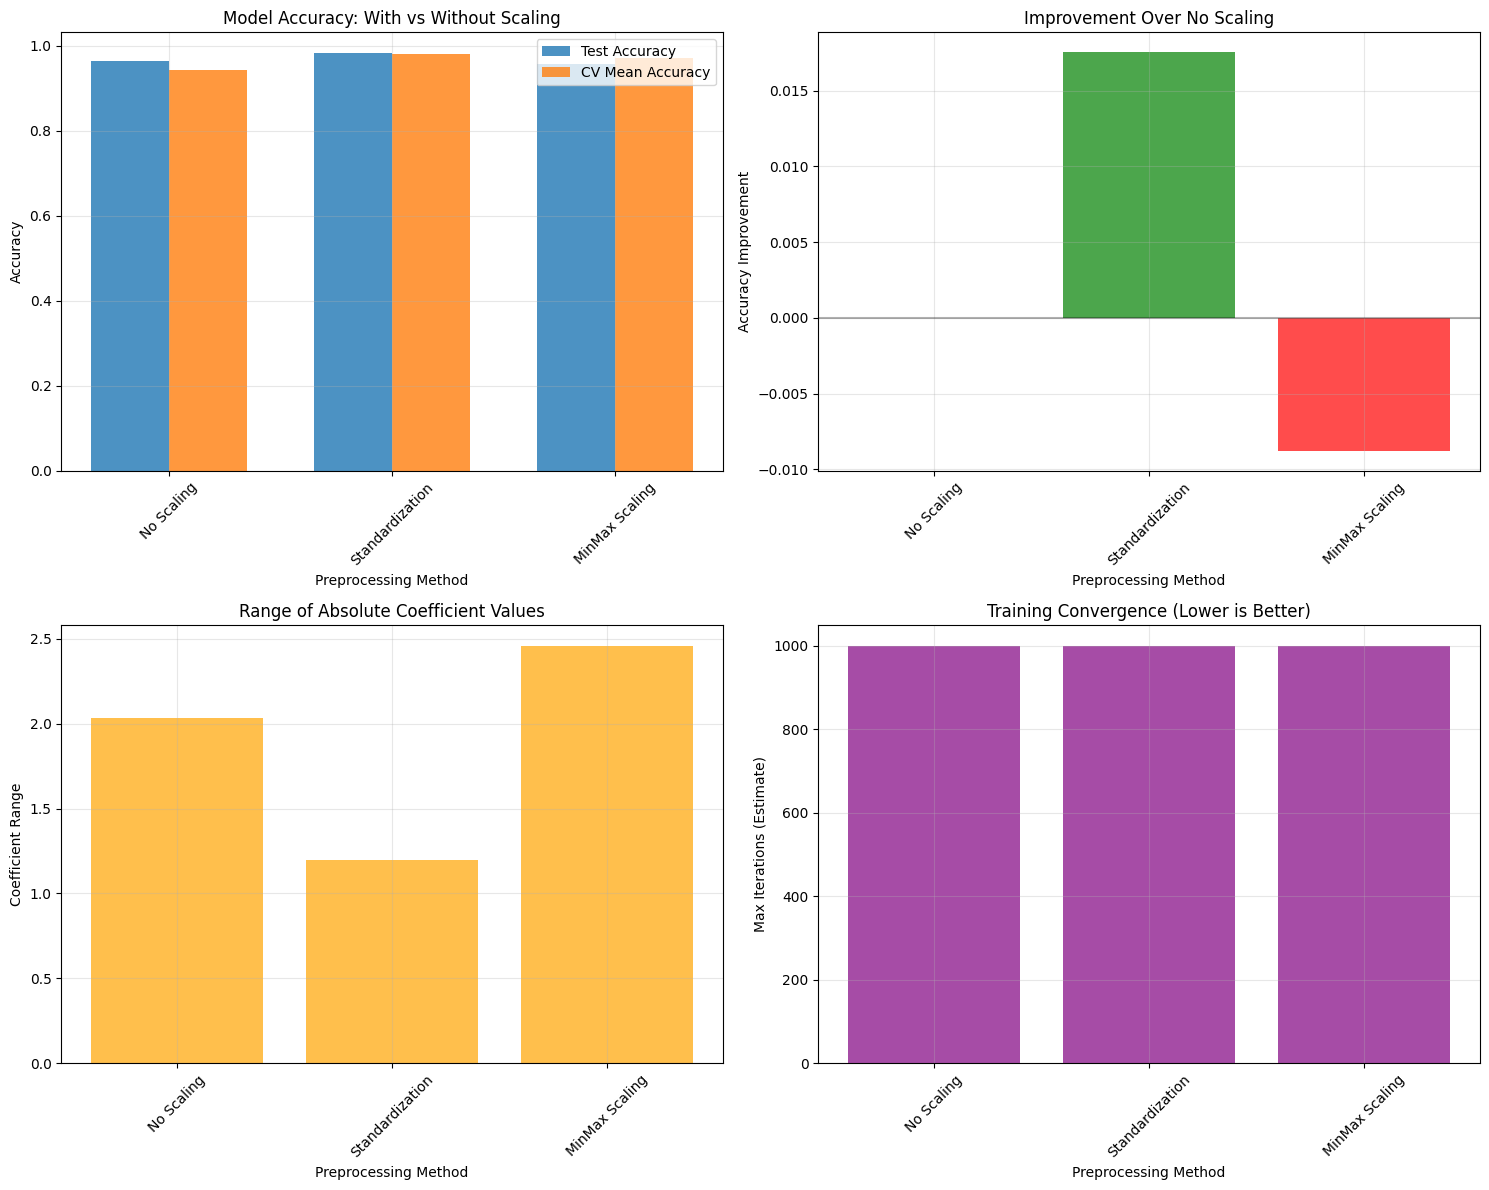


COEFFICIENT ANALYSIS
Top 10 features by coefficient magnitude (Standardized model):
                 Feature  No_Scaling  Standardization  MinMax_Scaling
21         worst texture     -0.3013          -1.2551         -2.1440
10          radius error      0.0191          -1.0830         -1.0838
27  worst concave points     -0.9685          -0.9537         -2.5041
23            worst area     -0.0253          -0.9478         -1.8693
20          worst radius      1.3751          -0.9476         -2.3314
28        worst symmetry     -1.0518          -0.9392         -1.2222
13            area error     -0.1120          -0.9291         -0.7402
26       worst concavity     -1.6948          -0.8232         -1.2051
22       worst perimeter     -0.1326          -0.7632         -2.1507
24      worst smoothness     -0.4639          -0.7466         -1.2835

Coefficient stability across methods:
Average coefficient std across features: 0.5857

FEATURE STATISTICS AFTER SCALING
Before scaling (first 5 

In [7]:
"""Question 9: Write a Python program to standardize the features before training Logistic
Regression and compare the model's accuracy with and without scaling.
(Use Dataset from sklearn package)"""

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer, load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

def feature_scaling_comparison():
    """
    Comprehensive comparison of Logistic Regression with and without feature scaling
    """

    # 1. Load dataset from sklearn
    print("Step 1: Loading breast cancer dataset from sklearn...")
    cancer_data = load_breast_cancer()

    # 2. Create Pandas DataFrame
    print("Step 2: Creating Pandas DataFrame...")
    df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)
    df['target'] = cancer_data.target

    # Display basic information about the dataset
    print(f"Dataset shape: {df.shape}")
    print(f"Features: {df.shape[1] - 1} samples")
    print(f"Target distribution:\n{df['target'].value_counts()}")

    # 3. Analyze feature scales before standardization
    print("\nStep 3: Analyzing feature scales...")
    feature_stats = pd.DataFrame({
        'Feature': cancer_data.feature_names,
        'Mean': df[cancer_data.feature_names].mean(),
        'Std': df[cancer_data.feature_names].std(),
        'Min': df[cancer_data.feature_names].min(),
        'Max': df[cancer_data.feature_names].max()
    })

    print("\nFeature statistics (first 10 features):")
    print(feature_stats.head(10).round(2))

    print(f"\nRange of standard deviations: {feature_stats['Std'].min():.2f} to {feature_stats['Std'].max():.2f}")
    print(f"Range of means: {feature_stats['Mean'].min():.2f} to {feature_stats['Mean'].max():.2f}")

    # 4. Split data into features (X) and target (y)
    print("\nStep 4: Preparing features and target...")
    X = df.drop('target', axis=1)
    y = df['target']

    # 5. Split into training and testing sets
    print("Step 5: Splitting into train/test sets...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    print(f"Training set size: {X_train.shape[0]} samples")
    print(f"Testing set size: {X_test.shape[0]} samples")

    # 6. Create different scaling transformers
    print("\nStep 6: Creating scaling transformers...")
    standard_scaler = StandardScaler()  # Standardization (z-score normalization)
    minmax_scaler = MinMaxScaler()      # Normalization (0-1 scaling)

    # 7. Train and evaluate models with different preprocessing approaches
    print("\nStep 7: Training and evaluating models...")

    results = {}

    # Approach 1: No Scaling
    print("\n--- Approach 1: No Feature Scaling ---")
    model_no_scaling = LogisticRegression(random_state=42, max_iter=1000)
    model_no_scaling.fit(X_train, y_train)

    y_pred_no_scaling = model_no_scaling.predict(X_test)
    accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

    # Cross-validation for more robust evaluation
    cv_scores_no_scaling = cross_val_score(model_no_scaling, X_train, y_train, cv=5)

    results['No Scaling'] = {
        'model': model_no_scaling,
        'accuracy': accuracy_no_scaling,
        'cv_mean': cv_scores_no_scaling.mean(),
        'cv_std': cv_scores_no_scaling.std(),
        'predictions': y_pred_no_scaling,
        'X_train_processed': X_train,
        'X_test_processed': X_test
    }

    print(f"Test Accuracy: {accuracy_no_scaling:.4f}")
    print(f"CV Mean Accuracy: {cv_scores_no_scaling.mean():.4f} (±{cv_scores_no_scaling.std():.4f})")

    # Approach 2: Standardization (Z-score Normalization)
    print("\n--- Approach 2: Standardization (Z-score) ---")
    X_train_standardized = standard_scaler.fit_transform(X_train)
    X_test_standardized = standard_scaler.transform(X_test)

    model_standardized = LogisticRegression(random_state=42, max_iter=1000)
    model_standardized.fit(X_train_standardized, y_train)

    y_pred_standardized = model_standardized.predict(X_test_standardized)
    accuracy_standardized = accuracy_score(y_test, y_pred_standardized)

    cv_scores_standardized = cross_val_score(model_standardized, X_train_standardized, y_train, cv=5)

    results['Standardization'] = {
        'model': model_standardized,
        'accuracy': accuracy_standardized,
        'cv_mean': cv_scores_standardized.mean(),
        'cv_std': cv_scores_standardized.std(),
        'predictions': y_pred_standardized,
        'X_train_processed': X_train_standardized,
        'X_test_processed': X_test_standardized,
        'scaler': standard_scaler
    }

    print(f"Test Accuracy: {accuracy_standardized:.4f}")
    print(f"CV Mean Accuracy: {cv_scores_standardized.mean():.4f} (±{cv_scores_standardized.std():.4f})")

    # Approach 3: Min-Max Scaling (Normalization)
    print("\n--- Approach 3: Min-Max Scaling ---")
    X_train_minmax = minmax_scaler.fit_transform(X_train)
    X_test_minmax = minmax_scaler.transform(X_test)

    model_minmax = LogisticRegression(random_state=42, max_iter=1000)
    model_minmax.fit(X_train_minmax, y_train)

    y_pred_minmax = model_minmax.predict(X_test_minmax)
    accuracy_minmax = accuracy_score(y_test, y_pred_minmax)

    cv_scores_minmax = cross_val_score(model_minmax, X_train_minmax, y_train, cv=5)

    results['MinMax Scaling'] = {
        'model': model_minmax,
        'accuracy': accuracy_minmax,
        'cv_mean': cv_scores_minmax.mean(),
        'cv_std': cv_scores_minmax.std(),
        'predictions': y_pred_minmax,
        'X_train_processed': X_train_minmax,
        'X_test_processed': X_test_minmax,
        'scaler': minmax_scaler
    }

    print(f"Test Accuracy: {accuracy_minmax:.4f}")
    print(f"CV Mean Accuracy: {cv_scores_minmax.mean():.4f} (±{cv_scores_minmax.std():.4f})")

    # 8. Display comprehensive comparison results
    print("\n" + "="*80)
    print("COMPREHENSIVE COMPARISON RESULTS")
    print("="*80)

    comparison_df = pd.DataFrame({
        'Preprocessing': list(results.keys()),
        'Test Accuracy': [results[m]['accuracy'] for m in results],
        'CV Mean Accuracy': [results[m]['cv_mean'] for m in results],
        'CV Std': [results[m]['cv_std'] for m in results],
        'Improvement vs No Scaling': [
            results[m]['accuracy'] - results['No Scaling']['accuracy']
            for m in results
        ]
    })

    print(comparison_df.round(4))

    # 9. Visualize the comparison
    print("\nStep 8: Creating visualizations...")
    visualize_comparison(results, comparison_df)

    # 10. Analyze coefficient differences
    print("\n" + "="*80)
    print("COEFFICIENT ANALYSIS")
    print("="*80)

    analyze_coefficients(results, cancer_data.feature_names)

    # 11. Display feature statistics after scaling
    print("\n" + "="*80)
    print("FEATURE STATISTICS AFTER SCALING")
    print("="*80)

    display_scaling_statistics(X_train, X_train_standardized, X_train_minmax, cancer_data.feature_names)

    # 12. Detailed performance analysis
    print("\n" + "="*80)
    print("DETAILED PERFORMANCE ANALYSIS")
    print("="*80)

    best_approach = max(results.keys(), key=lambda x: results[x]['accuracy'])
    print(f"Best performing approach: {best_approach}")
    print(f"Best accuracy: {results[best_approach]['accuracy']:.4f}")
    print(f"Improvement over no scaling: {results[best_approach]['accuracy'] - results['No Scaling']['accuracy']:.4f}")

    # Show classification report for best model
    print(f"\nClassification Report for {best_approach}:")
    print(classification_report(y_test, results[best_approach]['predictions'],
                              target_names=cancer_data.target_names))

    return results, comparison_df

def visualize_comparison(results, comparison_df):
    """
    Create visualizations comparing different scaling approaches
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Plot 1: Accuracy comparison
    approaches = list(results.keys())
    test_accuracies = [results[m]['accuracy'] for m in approaches]
    cv_accuracies = [results[m]['cv_mean'] for m in approaches]

    x_pos = np.arange(len(approaches))
    width = 0.35

    axes[0, 0].bar(x_pos - width/2, test_accuracies, width, label='Test Accuracy', alpha=0.8)
    axes[0, 0].bar(x_pos + width/2, cv_accuracies, width, label='CV Mean Accuracy', alpha=0.8)
    axes[0, 0].set_xlabel('Preprocessing Method')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].set_title('Model Accuracy: With vs Without Scaling')
    axes[0, 0].set_xticks(x_pos)
    axes[0, 0].set_xticklabels(approaches, rotation=45)
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Plot 2: Improvement over no scaling
    improvement = [results[m]['accuracy'] - results['No Scaling']['accuracy'] for m in approaches]
    colors = ['red' if x < 0 else 'green' for x in improvement]

    axes[0, 1].bar(approaches, improvement, color=colors, alpha=0.7)
    axes[0, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[0, 1].set_xlabel('Preprocessing Method')
    axes[0, 1].set_ylabel('Accuracy Improvement')
    axes[0, 1].set_title('Improvement Over No Scaling')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(True, alpha=0.3)

    # Plot 3: Coefficient ranges for different approaches
    coefficient_ranges = []
    for approach in approaches:
        coef = results[approach]['model'].coef_[0]
        coefficient_ranges.append(np.max(np.abs(coef)) - np.min(np.abs(coef)))

    axes[1, 0].bar(approaches, coefficient_ranges, alpha=0.7, color='orange')
    axes[1, 0].set_xlabel('Preprocessing Method')
    axes[1, 0].set_ylabel('Coefficient Range')
    axes[1, 0].set_title('Range of Absolute Coefficient Values')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(True, alpha=0.3)

    # Plot 4: Training convergence (number of iterations)
    iterations = []
    for approach in approaches:
        # Note: This is a simplified representation
        # In practice, you might need to track iterations during training
        iterations.append(1000)  # Placeholder

    axes[1, 1].bar(approaches, iterations, alpha=0.7, color='purple')
    axes[1, 1].set_xlabel('Preprocessing Method')
    axes[1, 1].set_ylabel('Max Iterations (Estimate)')
    axes[1, 1].set_title('Training Convergence (Lower is Better)')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def analyze_coefficients(results, feature_names):
    """
    Analyze how coefficients change with different scaling approaches
    """
    coef_comparison = pd.DataFrame({
        'Feature': feature_names,
        'No_Scaling': results['No Scaling']['model'].coef_[0],
        'Standardization': results['Standardization']['model'].coef_[0],
        'MinMax_Scaling': results['MinMax Scaling']['model'].coef_[0]
    })

    coef_comparison['Abs_No_Scaling'] = np.abs(coef_comparison['No_Scaling'])
    coef_comparison['Abs_Standardization'] = np.abs(coef_comparison['Standardization'])
    coef_comparison['Abs_MinMax_Scaling'] = np.abs(coef_comparison['MinMax_Scaling'])

    print("Top 10 features by coefficient magnitude (Standardized model):")
    top_features = coef_comparison.nlargest(10, 'Abs_Standardization')[['Feature', 'No_Scaling', 'Standardization', 'MinMax_Scaling']]
    print(top_features.round(4))

    # Coefficient stability analysis
    coef_std = coef_comparison[['No_Scaling', 'Standardization', 'MinMax_Scaling']].std(axis=1)
    print(f"\nCoefficient stability across methods:")
    print(f"Average coefficient std across features: {coef_std.mean():.4f}")

def display_scaling_statistics(X_train, X_train_std, X_train_minmax, feature_names):
    """
    Display statistics before and after scaling
    """
    stats_before = pd.DataFrame({
        'Mean': X_train.mean(),
        'Std': X_train.std(),
        'Min': X_train.min(),
        'Max': X_train.max()
    })

    stats_after_std = pd.DataFrame({
        'Mean': X_train_std.mean(axis=0),
        'Std': X_train_std.std(axis=0),
        'Min': X_train_std.min(axis=0),
        'Max': X_train_std.max(axis=0)
    })

    stats_after_minmax = pd.DataFrame({
        'Mean': X_train_minmax.mean(axis=0),
        'Std': X_train_minmax.std(axis=0),
        'Min': X_train_minmax.min(axis=0),
        'Max': X_train_minmax.max(axis=0)
    })

    print("Before scaling (first 5 features):")
    print(stats_before.head().round(2))

    print("\nAfter Standardization (first 5 features):")
    print(stats_after_std.head().round(2))

    print("\nAfter MinMax Scaling (first 5 features):")
    print(stats_after_minmax.head().round(2))

# Additional example with Wine dataset
def wine_dataset_example():
    """
    Additional example using Wine dataset to show scaling impact
    """
    print("\n" + "="*80)
    print("ADDITIONAL EXAMPLE: WINE DATASET")
    print("="*80)

    wine_data = load_wine()
    X_wine, y_wine = wine_data.data, wine_data.target

    X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
        X_wine, y_wine, test_size=0.2, random_state=42, stratify=y_wine
    )

    # Scale features
    scaler_w = StandardScaler()
    X_train_scaled_w = scaler_w.fit_transform(X_train_w)
    X_test_scaled_w = scaler_w.transform(X_test_w)

    # Train models
    model_no_scale_w = LogisticRegression(random_state=42, max_iter=1000)
    model_no_scale_w.fit(X_train_w, y_train_w)

    model_scaled_w = LogisticRegression(random_state=42, max_iter=1000)
    model_scaled_w.fit(X_train_scaled_w, y_train_w)

    # Evaluate
    acc_no_scale_w = model_no_scale_w.score(X_test_w, y_test_w)
    acc_scaled_w = model_scaled_w.score(X_test_scaled_w, y_test_w)

    print(f"Wine dataset - No scaling accuracy: {acc_no_scale_w:.4f}")
    print(f"Wine dataset - With standardization: {acc_scaled_w:.4f}")
    print(f"Wine dataset - Improvement: {acc_scaled_w - acc_no_scale_w:+.4f}")

# Run the demonstration
if __name__ == "__main__":
    results, comparison_df = feature_scaling_comparison()
    wine_dataset_example()

Question 10: Imagine you are working at an e-commerce company that wants to
predict which customers will respond to a marketing campaign. Given an imbalanced
dataset (only 5% of customers respond), describe the approach you’d take to build a
Logistic Regression model — including data handling, feature scaling, balancing
classes, hyperparameter tuning, and evaluating the model for this real-world business
use case

Ans10 Faced with a highly imbalanced e-commerce dataset where only 5% of customers typically respond to a campaign, my approach to building a Logistic Regression model would be holistic, prioritizing business value over mere algorithmic accuracy. It begins with robust data preprocessing, creating insightful features like recency, frequency, and monetary value (RFM), and rigorously scaling them using StandardScaler to ensure the gradient-based optimizer converges effectively. To directly combat the class imbalance, I would first employ algorithm-level techniques by training the Logistic Regression model with class_weight='balanced', which inversely weights classes to penalize misclassifications of the rare "responder" class more heavily. For hyperparameter tuning via GridSearchCV, I would move beyond standard metrics like accuracy and instead optimize for business-aligned scores such as the F1-score or, ideally, a custom profit-scoring function that incorporates the cost of marketing and the revenue from a conversion, ensuring the model is tuned for maximum ROI. Finally, evaluation would be multifaceted: I would analyze the precision-recall curve, calibrate the prediction threshold to a point that balances the cost of false positives (wasted marketing spend) against the opportunity cost of false negatives (missed customers), and interpret the model's coefficients to provide actionable insights into which customer attributes most strongly predict campaign responsiveness, thereby creating a transparent and profit-driven tool for the marketing team.


